In [7]:
import FunctionCollection as fc
import numpy as np
import matplotlib.pyplot as plt
import importlib
import torch
import pandas as pd

Investigate whether the oscNext plot is present

In [44]:
import sqlite3

filename = "rasmus_classification_muon_3neutrino_3mio.db"
db_path = "C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/raw_data/{}".format(filename)

with sqlite3.connect(str(db_path)) as con:
    query = "SELECT energy_log10, zenith FROM truth WHERE pid IN (-14,14)"
    df = pd.read_sql(query,con)

In [54]:
transformer = pd.read_pickle('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/datasets/transformers.pkl')

E = transformer['truth']['energy_log10'].inverse_transform(df.energy_log10.to_numpy().reshape(-1,1)).flatten()
ze = transformer['truth']['zenith'].inverse_transform(df.zenith.to_numpy().reshape(-1,1)).flatten()

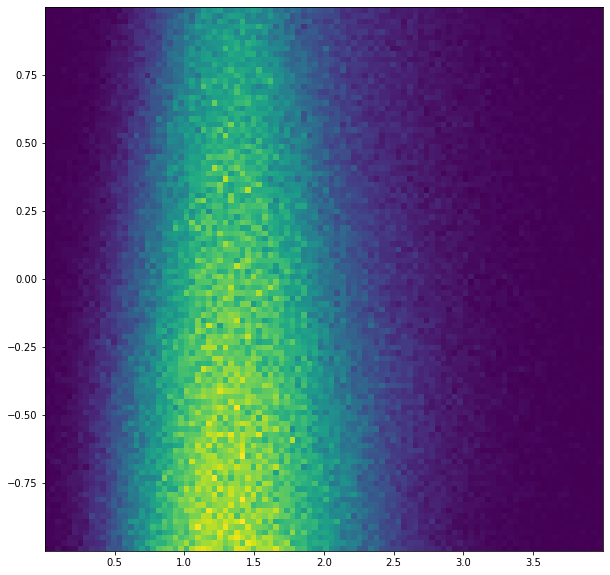

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist2d(E,np.cos(ze),bins=100);

In [8]:
def target_constructor(dataset,transformer):
    E_ze = dataset.data.y.view(-1,10,1)[:,[0,9]]
    dataset.data.y = torch.cat([torch.tensor(transformer['truth']['energy_log10'].inverse_transform(E_ze[:,0]),dtype=torch.float),
                               torch.tensor(transformer['truth']['zenith'].inverse_transform(E_ze[:,1]),dtype=torch.float)],dim=1).flatten()
    dataset.slices['y'] = np.arange(0,len(dataset.data.y)+1,2)
    return dataset

In [16]:
fc = importlib.reload(fc)

name = '100k_muonNeutrino_set12.pt'
path = 'C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/datasets'
transformer = pd.read_pickle('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/datasets/transformers.pkl')

dataset, train_loader, test_loader, val_loader = fc.dataset_preparator(name,
                                                                       path,
                                                                       transformer,
                                                                       target_constructor,
                                                                       fc.custom_feature_constructor,
                                                                       TrTV_split = (0,1,1))

2021-02-15 11:58:39.663397: loading data..
2021-02-15 11:58:39.868800: executing target constructor..
2021-02-15 11:58:39.873797: executing feature constructor..
2021-02-15 11:58:47.411138: shuffling dataset..
2021-02-15 11:58:47.450124: defining dataloaders..
2021-02-15 11:58:47.450124: Done!


In [36]:
E = dataset.data.y.view(-1,2)[:,0].numpy()
ze = dataset.data.y.view(-1,2)[:,1].numpy()

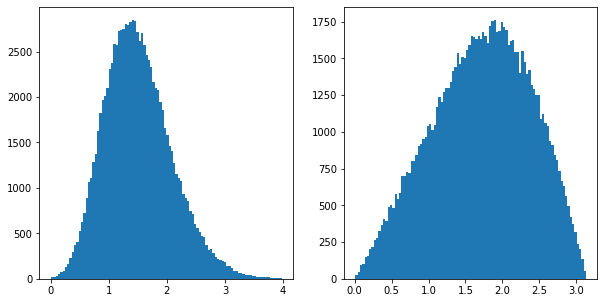

In [37]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2)
ax[0].hist(E,bins=100);
ax[1].hist(ze,bins=100);

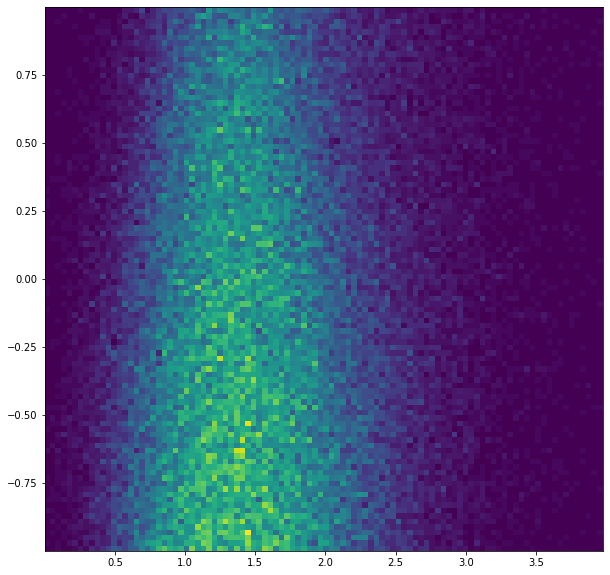

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist2d(E,np.cos(ze),bins=100);

In [22]:
# import Models.Model11_2 as Model
# device = torch.device('cuda')
# model = Model.Net11().to(device)

# state = torch.load('Trained_Models/Model11_SRT_and_corrected.pt')

# model.load_state_dict(state['model_state_dict'])